In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Task 1: Data Loading and Understanding
#Loaddata
State_Txn = pd.read_excel('phonepe-pulse_raw-data.xlsx',sheet_name="State_Txn and Users")
State_TxnSplit = pd.read_excel('phonepe-pulse_raw-data.xlsx',sheet_name="State_TxnSplit")
State_DeviceData = pd.read_excel('phonepe-pulse_raw-data.xlsx',sheet_name="State_DeviceData")
District_Txn = pd.read_excel('phonepe-pulse_raw-data.xlsx',sheet_name="District_Txn and Users")
DistrictDemo = pd.read_excel('phonepe-pulse_raw-data.xlsx',sheet_name="District Demographics")

In [3]:
#First 5 rows
State_Txn.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [4]:
#Last 10 rows
State_TxnSplit.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [5]:
#Middle 5 rows
shap = State_DeviceData.shape
startcount = int(shap[0]/2)
endcount = startcount+10
print(startcount)
print(endcount)

2772
2782


In [6]:
State_DeviceData[startcount:endcount]

,State,Year,Quarter,Brand,Registered Users,Percentage
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900
2777,Lakshadweep,2018,1,OnePlus,22,0.043912
2778,Lakshadweep,2018,1,Apple,20,0.039920
2779,Lakshadweep,2018,1,Realme,20,0.039920
2780,Lakshadweep,2018,1,Gionee,12,0.023952
2781,Lakshadweep,2018,1,COOLPAD,10,0.019960


In [7]:
#Firs 10 and last 10 rows
s1 = District_Txn.head(10)
s2 = District_Txn.tail(10)
s3 = pd.concat([s1,s2])
s3

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


In [8]:
#display every 10th row -- through silicing
DistrictDemo[9::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
9,Andhra Pradesh,Srikakulam,Srikakulam,2699471,5837.0,462,AP09,Srikakulam
19,Arunachal Pradesh,Kurung Kumey,Koloriang,89717,6040.0,15,AR07,Kurung Kumey
29,Arunachal Pradesh,Shi Yomi,Tato,13310,2875.0,5,AR17,Shi Yomi
39,Assam,Bajali,Pathsala,253816,0.0,0,AS01,Bajali
49,Assam,Dibrugarh,Dibrugarh,1327748,3381.0,393,AS12,Dibrugarh
...,...,...,...,...,...,...,...,...
699,Andaman & Nicobar Islands,South Andaman,Port Blair,238142,2672.0,89,AN03,South Andaman
709,Jammu & Kashmir,Ganderbal,Ganderbal,297003,1979.0,1151,JK06,Ganderbal
719,Jammu & Kashmir,Reasi,Reasi,314714,1710.0,184,JK16,Reasi
729,Delhi,New Delhi,Connaught Place,142004,22.0,4057,DL03,New Delhi


In [9]:
#Basic stats for Numeric colums and dtpes

In [10]:
#Question 1.2: Display basic statistics and data types for each dataset
sheet_values = [State_Txn,State_TxnSplit,State_DeviceData,District_Txn,DistrictDemo]
for sheet in sheet_values:
    print(sheet.describe())
    print(sheet.dtypes)

              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75%        7.320945e+06  8.615022e+07  
max 

In [11]:
#Question 1.3: Check for missing values
#Missing values
for sheet in sheet_values:
    missing_count = sheet.isnull().sum()
    print(missing_count)
    total_count = len(sheet)
    print(total_count)

State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64
504
State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64
2514
State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64
5544
State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64
10248
State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64
742


In [12]:
def missing_values(df):
    missing = (df.isna().sum()[df.isna().sum()>0]/df.shape[0])*100
    return missing

In [13]:
df = [State_Txn,State_TxnSplit,State_DeviceData,District_Txn,DistrictDemo]
for miss in df:
    print(missing_values(miss))

Amount (INR)    0.198413
dtype: float64
Series([], dtype: float64)
Series([], dtype: float64)
Code         0.273224
ATV (INR)    0.039032
dtype: float64
Series([], dtype: float64)


In [14]:
#Checking missing values
file_path = 'phonepe-pulse_raw-data.xlsx'
sheet_names = ['State_Txn and Users','State_TxnSplit','State_DeviceData','District_Txn and Users','District Demographics']
all_sheets = pd.read_excel(file_path,sheet_name=sheet_names)

In [15]:
def misssing_values(sheet_data,sheet_name):
    print(f"\nMissing Values Analysis for {sheet_name} dataset:")
    missing_count = sheet_data.isnull().sum()
    total_count = len(sheet_data)
    missing_percent = (missing_count/total_count)*100
    missing_data = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent
    })
    missing_data = missing_data[missing_data['Missing Count'] > 0]
    if missing_data.empty:
        print("No missing values found:")
    else:
        print(missing_data)
        max_missing_col = missing_data['Missing Percentage'].idxmax()
        max_missing_percentage = missing_data.loc[max_missing_col, 'Missing Percentage']
        print(f"\nColumn with the highest percentage of missing values: '{max_missing_col}' ({max_missing_percentage:.2f}%)")    
for sheet_name,sheet_data in all_sheets.items():
    misssing_values(sheet_data,sheet_name)    


Missing Values Analysis for State_Txn and Users dataset:
              Missing Count  Missing Percentage
Amount (INR)              1            0.198413

Column with the highest percentage of missing values: 'Amount (INR)' (0.20%)

Missing Values Analysis for State_TxnSplit dataset:
No missing values found:

Missing Values Analysis for State_DeviceData dataset:
No missing values found:

Missing Values Analysis for District_Txn and Users dataset:
           Missing Count  Missing Percentage
Code                  28            0.273224
ATV (INR)              4            0.039032

Column with the highest percentage of missing values: 'Code' (0.27%)

Missing Values Analysis for District Demographics dataset:
No missing values found:


In [16]:
#Question 1.4: Create a summary
#Total states and distict
Total_states= DistrictDemo['State'].nunique()
Total_dist = DistrictDemo['District'].nunique()
print("Total states:",Total_states)
print("Total dist:",Total_dist)

Total states: 36
Total dist: 736


In [17]:
# Highest distinct containing state 
dist_count_by_state = DistrictDemo['State'].value_counts()
state_with_max_dist = dist_count_by_state.idxmax()
no_of_maxcout = dist_count_by_state.max()
print(f"State with Highest distict : {state_with_max_dist} with count {no_of_maxcout}")

State with Highest distict : Uttar Pradesh with count 75


In [18]:
#Task 2: Exploratory Data Analysis (EDA)
#Question 2.1: Analyze transaction trends over the years for each state
Total_data = State_Txn.groupby(['State','Year']).agg(
             Total_tansactions = ('Transactions','sum'),Total_tans_amount = ('Amount (INR)','sum')).reset_index()
Pivot_table = Total_data.pivot(index = 'State',columns = 'Year',values =  (['Total_tansactions','Total_tans_amount']))
print("Trends Over the year of each state")
Pivot_table

Trends Over the year of each state


Total_tansactions               \
Year                                              2018         2019   
State                                                                 
Andaman & Nicobar Islands                      58021.0     133104.0   
Andhra Pradesh                              77779112.0  297180254.0   
Arunachal Pradesh                             435229.0    1314871.0   
Assam                                        8806777.0   22691015.0   
Bihar                                       44556885.0  131986927.0   
Chandigarh                                   2383031.0    5884404.0   
Chhattisgarh                                13933118.0   45826483.0   
Dadra & Nagar Haveli and Daman & Diu         1044832.0    2559192.0   
Delhi                                       64231244.0  254461712.0   
Goa                                          1244738.0    4114941.0   
Gujarat                                     39761960.0  134749574.0   
Haryana                                     31843908.0  113047107.0   
Himachal Pradesh                             3364250.0   10922850.0   
Jammu & Kashmir                              7763165.0    7487796.0   
Jharkhand                                   19737665.0   51985184.0   
Karnataka                                   99925678.0  610519200.0   
Kerala                                      11524547.0   35537598.0   
Ladakh                                         81174.0     292019.0   
Lakshadweep                                     6255.0      12276.0   
Madhya Pradesh                              57111347.0  199889462.0   
Maharashtra                                116301535.0  526225123.0   
Manipur                                       661158.0    1317186.0   
Meghalaya                                     388850.0    1113558.0   
Mizoram                                       140170.0     369310.0   
Nagaland                                      342148.0     936380.0   
Odisha                                      65162918.0  169961871.0   
Puducherry                                    732708.0    2810650.0   
Punjab                                      12800841.0   40087404.0   
Rajasthan                                   52782208.0  246343185.0   
Sikkim                                        381689.0    1948037.0   
Tamil Nadu                                  54950272.0  162453376.0   
Telangana                                   67541293.0  439968715.0   
Tripura                                      1188478.0    2627025.0   
Uttar Pradesh                               92864871.0  271736968.0   
Uttarakhand                                  8358700.0   23431868.0   
West Bengal                                120011635.0  257900590.0   

                                                                  \
Year                                          2020          2021   
State                                                              
Andaman & Nicobar Islands             4.462740e+05  5.861660e+05   
Andhra Pradesh                        7.636167e+08  6.425151e+08   
Arunachal Pradesh                     3.547905e+06  2.745794e+06   
Assam                                 4.713522e+07  4.494496e+07   
Bihar                                 2.665640e+08  2.705361e+08   
Chandigarh                            8.861323e+06  8.387784e+06   
Chhattisgarh                          9.802309e+07  8.412586e+07   
Dadra & Nagar Haveli and Daman & Diu  4.807834e+06  4.050327e+06   
Delhi                                 3.648219e+08  3.275163e+08   
Goa                                   9.080241e+06  1.004168e+07   
Gujarat                               2.318653e+08  2.066160e+08   
Haryana                               2.269268e+08  1.959336e+08   
Himachal Pradesh                      2.160241e+07  1.709793e+07   
Jammu & Kashmir                       1.277698e+07  1.702539e+07   
Jharkhand                             1.049243e+08  9.862381e+07   
Karnataka                             1.216

In [19]:
#Top 5 states having highest and Lowest Transaction Volume
High_tans_vol_st = Total_data.groupby(['State'])['Total_tansactions'].sum().head()
Low_tans_vol_st = Total_data.groupby(['State'])['Total_tansactions'].sum().tail()
print("\nTop 5 states having highest Transaction Volume ",High_tans_vol_st)
print("\nTop 5 states having Lowest Transaction Volume",Low_tans_vol_st)


Top 5 states having highest Transaction Volume  State
Andaman & Nicobar Islands       1223565
Andhra Pradesh               1781091169
Arunachal Pradesh               8043799
Assam                         123577981
Bihar                         713643889
Name: Total_tansactions, dtype: int64

Top 5 states having Lowest Transaction Volume State
Telangana        2347430243
Tripura            12018152
Uttar Pradesh    1314714390
Uttarakhand       124011162
West Bengal       942286041
Name: Total_tansactions, dtype: int64


In [20]:
#Question 2.2: Identify the most common transaction types in each state and quarter
#Most Common product for every quarter of each state
group_data = State_TxnSplit.groupby(['State','Year','Quarter','Transaction Type'])['Transactions'].sum().reset_index()
Most_coomon = group_data.loc[group_data.groupby(['State','Year','Quarter'])['Transactions'].idxmax()]
Most_coomon_table_format = Most_coomon.pivot(index='State',columns = ['Quarter','Year'],values = ('Transaction Type'))
print("\n Most Common product for every quarter of each state")
Most_coomon_table_format


 Most Common product for every quarter of each state


Quarter,1,2,3,4,1,2,3,4,1,2,3,4,1,2
Year,2018,2018,2018,2018,2019,2019,2019,2019,2020,2020,2020,2020,2021,2021
State,,,,,,,,,,,,,,
Andaman & Nicobar Islands,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments
Andhra Pradesh,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments
Arunachal Pradesh,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments
Assam,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments
Bihar,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments
Chandigarh,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Merchant payments,Merchant payments,Merchant payments
Chhattisgarh,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments
Dadra & Nagar Haveli and Daman & Diu,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Recharge & bill payments,Peer-to-peer payments,Peer-to-peer payments,Peer-to-peer payments


In [21]:
#Question 2.3: Determine the device brand with the highest number of registered users in each state
#State and Brand with high Registered Users
Group_data = State_DeviceData.groupby(['State','Brand'])['Registered Users'].sum().reset_index()
Max_Brand_by_state = Group_data.loc[Group_data.groupby(['State'])['Registered Users'].idxmax()]
print("\n State and Brand with high Registered Users")
Max_Brand_by_state[['State','Brand']]


 State and Brand with high Registered Users


,State,Brand
11,Andaman & Nicobar Islands,Xiaomi
22,Andhra Pradesh,Xiaomi
34,Arunachal Pradesh,Xiaomi
46,Assam,Xiaomi
60,Bihar,Xiaomi
73,Chandigarh,Xiaomi
85,Chhattisgarh,Xiaomi
98,Dadra & Nagar Haveli and Daman & Diu,Xiaomi
109,Delhi,Xiaomi
120,Goa,Xiaomi


In [22]:
#Question 2.4: Create a list of the top district per state based on population
#Top District in each state with highest Population
Groupd_data = DistrictDemo.groupby(['State','District'])['Population'].sum().reset_index()
Top_dist_of_state = Groupd_data.loc[Groupd_data.groupby(['State'])['Population'].idxmax()]
print("\n Top District in each state with highest Population")
Top_dist_of_state_table = Top_dist_of_state[['State','District','Population']].sort_values(by='Population', ascending=False)
Top_dist_of_state_table


 Top District in each state with highest Population


,State,District,Population
734,West Bengal,North 24 Parganas,10082852
272,Karnataka,Bangalore Urban,9588910
397,Maharashtra,Pune,9426959
158,Gujarat,Ahmedabad,7208200
554,Tamil Nadu,Chennai,7139882
530,Rajasthan,Jaipur,6663971
633,Uttar Pradesh,Allahabad,5959798
100,Bihar,Patna,5772804
5,Andhra Pradesh,East Godavari,5151549
308,Kerala,Malappuram,4110956


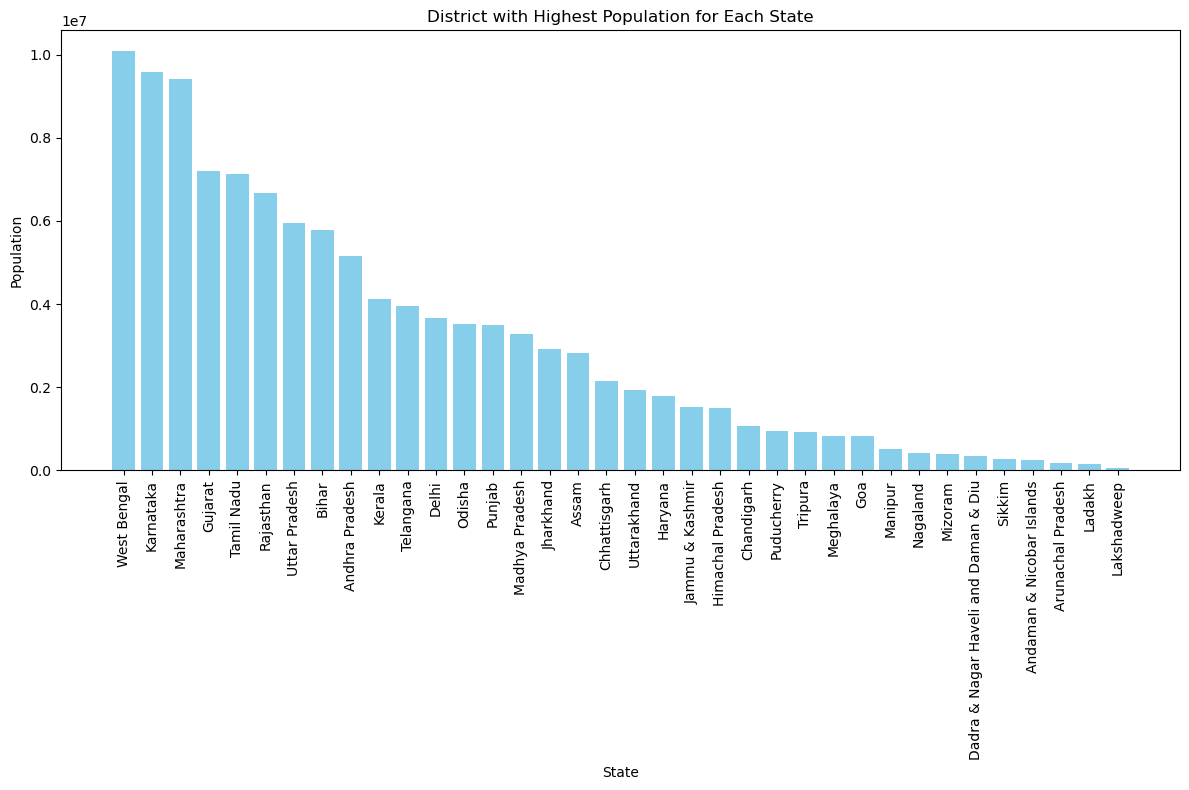

In [23]:
#District with Highest Population for Each State
plt.figure(figsize=(12,8))
plt.bar(Top_dist_of_state_table['State'],Top_dist_of_state_table['Population'],color = 'skyblue')
plt.xlabel("State")
plt.ylabel("Population")
plt.title("District with Highest Population for Each State")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [24]:
#Question 2.5: Calculate the average transaction value (ATV) for each state
#Average transaction amount of each state
avg_tansaction_amount = State_Txn.groupby('State')['ATV (INR)'].sum().reset_index()
print("Average transaction amount of each state")
avg_tansaction_amount_table = avg_tansaction_amount[['State','ATV (INR)']].sort_values(by ='ATV (INR)',ascending = True)
avg_tansaction_amount_table

Average transaction amount of each state


,State,ATV (INR)
35,West Bengal,19230.408260
25,Odisha,19993.923141
7,Dadra & Nagar Haveli and Daman & Diu,20823.538391
20,Maharashtra,21229.065480
15,Karnataka,21243.491492
32,Tripura,21758.184592
8,Delhi,22257.750300
19,Madhya Pradesh,22416.431359
14,Jharkhand,22852.801951
6,Chhattisgarh,23111.460632


In [25]:
#Top 5 states of highest and lowest ATV value
print("\nTop 5 states of highest ATV value")
print(avg_tansaction_amount_table.head(5))
print("\nTop 5 states of lowest ATV value")
print(avg_tansaction_amount_table.tail(5))


Top 5 states of highest ATV value
                                   State     ATV (INR)
35                           West Bengal  19230.408260
25                                Odisha  19993.923141
7   Dadra & Nagar Haveli and Daman & Diu  20823.538391
20                           Maharashtra  21229.065480
15                             Karnataka  21243.491492

Top 5 states of lowest ATV value
                        State     ATV (INR)
2           Arunachal Pradesh  36936.535789
18                Lakshadweep  38865.661810
23                    Mizoram  40985.249221
0   Andaman & Nicobar Islands  44229.729913
17                     Ladakh  47715.121781


In [26]:
#Question 2.6: Analyze app usage trends
#Total number of app opens over the years and quarters for each state
Group_data = State_Txn.groupby(['State','Year','Quarter'])['App Opens'].sum().reset_index()
Total_state_App_Opens = Group_data.pivot(index = 'State',columns = ['Year','Quarter'],values = ('App Opens'))
print("Total number of app opens over the years and quarters for each state")
Total_state_App_Opens

Total number of app opens over the years and quarters for each state


Year                                 2018          2019                        \
Quarter                                 1  2  3  4    1          2          3   
State                                                                           
Andaman & Nicobar Islands               0  0  0  0    0      52640     171107   
Andhra Pradesh                          0  0  0  0    0   81375251  310953542   
Arunachal Pradesh                       0  0  0  0    0     502873    1811700   
Assam                                   0  0  0  0    0    7350326   25393673   
Bihar                                   0  0  0  0    0   39607022  126521298   
Chandigarh                              0  0  0  0    0    1220176    4625196   
Chhattisgarh                            0  0  0  0    0   13206373   46362341   
Dadra & Nagar Haveli and Daman & Diu    0  0  0  0    0     860686    3126189   
Delhi                                   0  0  0  0    0   43731570  163381027   
Goa                                     0  0  0  0    0    1352232    4753892   
Gujarat                                 0  0  0  0    0   34890301  129441484   
Haryana                                 0  0  0  0    0   31929195  118332587   
Himachal Pradesh                        0  0  0  0    0    3321711   10720741   
Jammu & Kashmir                         0  0  0  0    0    2705373    3843919   
Jharkhand                               0  0  0  0    0   14929066   55504460   
Karnataka                               0  0  0  0    0  113024811  445683660   
Kerala                                  0  0  0  0    0    8673220   31471694   
Ladakh                                  0  0  0  0    0     157317     503126   
Lakshadweep                             0  0  0  0    0       4580      15038   
Madhya Pradesh                          0  0  0  0    0   50642151  192353380   
Maharashtra                             0  0  0  0    0  109967705  439998413   
Manipur                                 0  0  0  0    0     464829    1594205   
Meghalaya                               0  0  0  0    0     395764    1387814   
Mizoram                                 0  0  0  0    0     133025     457834   
Nagaland                                0  0  0  0    0     362497    1244022   
Odisha                                  0  0  0  0    0   33955545  130181456   
Puducherry                              0  0  0  0    0     661932    2476922   
Punjab                                  0  0  0  0    0   10928094   40860886   
Rajasthan                               0  0  0  0    0   62787336  238338999   
Sikkim                                  0  0  0  0    0     398520    1316804   
Tamil Nadu                              0  0  0  0    0   33658961  124690342   
Telangana                               0  0  0  0    0   80842302  318124511   
Tripura                                 0  0  0  0    0     953627    3350991   
Uttar Pradesh                           0  0  0  0    0   78394040  268142606   
Uttarakhand                             0  0  0  0    0    7454279   24660988   
West Bengal                             0  0  0  0    0   49514201  176559011   

Year                                                  2020             \
Quarter                                       4          1          2   
State                                                                   
Andaman & Nicobar Islands                177012     193586     305072   
Andhra Pradesh                        411201518  486513773  494341698   
Arunachal Pradesh                       2140340    2598321    3387006   
Assam                                  26599449   33097892   39304924   
Bihar                                 163998097  183868505  218435035   
Chandigarh                              4960441    5201211    3451250   
Chhattisgarh                           57278977   64224101   68493384   
Dadra & Nagar Haveli and Daman & Diu    3770543    4195122    4505127   
Delhi                                

C:\Users\VamC\AppData\Local\Temp\ipykernel_15752\2622635551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_Telangana_App_Opens['Year_Quarter'] = Total_Telangana_App_Opens['Year'].astype(str)+'Q'+Total_Telangana_App_Opens['Quarter'].astype(str)


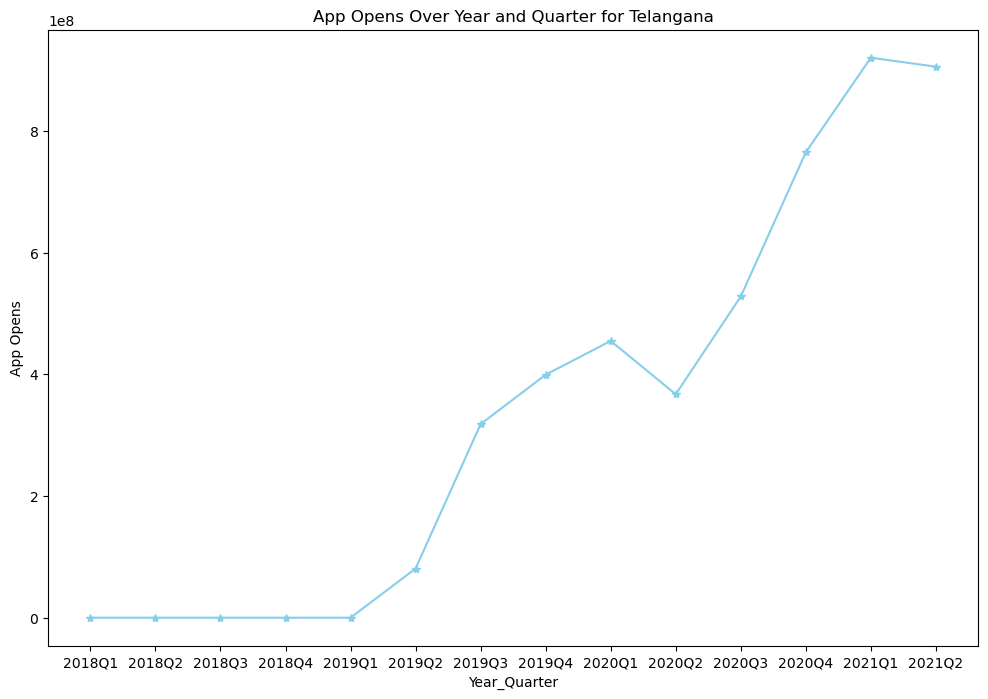

In [27]:
#App Opens Over Year and Quarter for Telangana
Total_Telangana_App_Opens = State_Txn[State_Txn['State']=='Telangana']
Total_Telangana_App_Opens['Year_Quarter'] = Total_Telangana_App_Opens['Year'].astype(str)+'Q'+Total_Telangana_App_Opens['Quarter'].astype(str)
Total_Telangana_App_Opens['Year_Quarter']
plt.figure(figsize=(12,8))
plt.plot(Total_Telangana_App_Opens['Year_Quarter'],Total_Telangana_App_Opens['App Opens'],color='skyblue',marker='*')
plt.xlabel("Year_Quarter")
plt.ylabel("App Opens")
plt.title("App Opens Over Year and Quarter for Telangana")
plt.show()

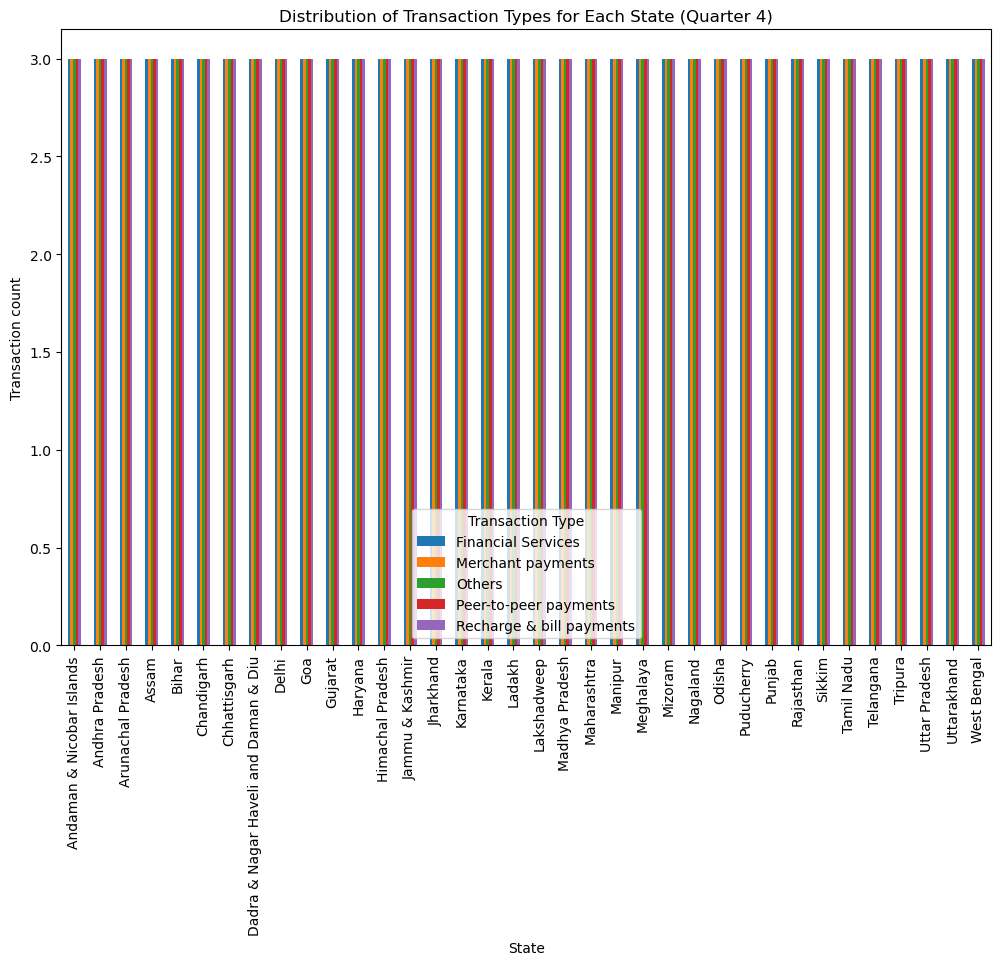

In [28]:
#Question 2.7: Distribution of transaction types
#Distribution of Transaction Types for Each State Quarter
most_recent = State_TxnSplit['Quarter'].max()
recent_quarter_date = State_TxnSplit[State_TxnSplit['Quarter']==most_recent]
transaction_counts=recent_quarter_date.groupby(['State','Transaction Type']).size().unstack(fill_value=0)
transaction_counts.plot(kind='bar',stacked = False,figsize=(12,8))
plt.xlabel('State')
plt.ylabel('Transaction count')
plt.title(f'Distribution of Transaction Types for Each State (Quarter {most_recent})')
plt.show()

In [29]:
#Question 2.8: Find unique mapping between district name and district code
unique_district_code = District_Txn[['District','Code']].drop_duplicates()
unique_district_code.to_csv('unique_district_code.csv',index=False)
print("unique_district_code sucessfully created")

unique_district_code sucessfully created


In [30]:
#Task 3: Data Quality Checks
#Finding Total Number of transaction,Total transaction ammount,Total registered used for each state
District_count = District_Txn.groupby('State').agg(Total_transaction = ('Transactions','sum'),
                                  Total_amount=('Amount (INR)','sum'),Total_users = ('Registered Users','sum')).reset_index()
print("Finding Total Number of transaction,Total transaction ammount,Total registered used for each state")
State_count = State_Txn.groupby('State').agg(Total_transaction = ('Transactions','sum'),
                                  Total_amount=('Amount (INR)','sum'),Total_users = ('Registered Users','sum')).reset_index()
District_count

Finding Total Number of transaction,Total transaction ammount,Total registered used for each state


,State,Total_transaction,Total_amount,Total_users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320


In [31]:
State_count

,State,Total_transaction,Total_amount,Total_users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.187847e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320


In [32]:
print(District_count==State_count)

    State  Total_transaction  Total_amount  Total_users
0    True               True         False         True
1    True               True         False         True
2    True               True         False         True
3    True               True         False         True
4    True               True         False         True
5    True               True         False         True
6    True               True         False         True
7    True               True         False         True
8    True               True         False         True
9    True               True         False         True
10   True               True         False         True
11   True               True         False         True
12   True               True         False         True
13   True               True         False         True
14   True               True         False         True
15   True               True         False         True
16   True               True         False      

In [33]:
#Task 4: Data Merging and Advanced Analysis
pd.merge(District_count,State_count,on='State',how='left')

,State,Total_transaction_x,Total_amount_x,Total_users_x,Total_transaction_y,Total_amount_y,Total_users_y
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.860292e+12,158007957,1781091169,3.187847e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320,24481604,4.427187e+10,4755320


In [34]:
#Data merging and Advance analysis
#Question 4.1: Ratio of users to population by state
state_population = DistrictDemo.groupby('State')['Population'].sum()
Merged_data = pd.merge(State_Txn,state_population,on='State',how='inner')
Merged_data['Ratio_of_reg_users'] = Merged_data['Registered Users']/Merged_data['Population']*100
print('\n Dispaly Ratio of Registered Users to population by users')
Merged_data[['State','Registered Users','Population','Ratio_of_reg_users']]


 Dispaly Ratio of Registered Users to population by users


,State,Registered Users,Population,Ratio_of_reg_users
0,Andaman & Nicobar Islands,6740,380581,1.770976
1,Andaman & Nicobar Islands,9405,380581,2.471222
2,Andaman & Nicobar Islands,12149,380581,3.192225
3,Andaman & Nicobar Islands,15222,380581,3.999674
4,Andaman & Nicobar Islands,18596,380581,4.886213
...,...,...,...,...
499,West Bengal,13222022,92828987,14.243419
500,West Bengal,14448366,92828987,15.564498
501,West Bengal,15662093,92828987,16.871985
502,West Bengal,16808799,92828987,18.107274


Column chart depicting the ratio of users to Population by state


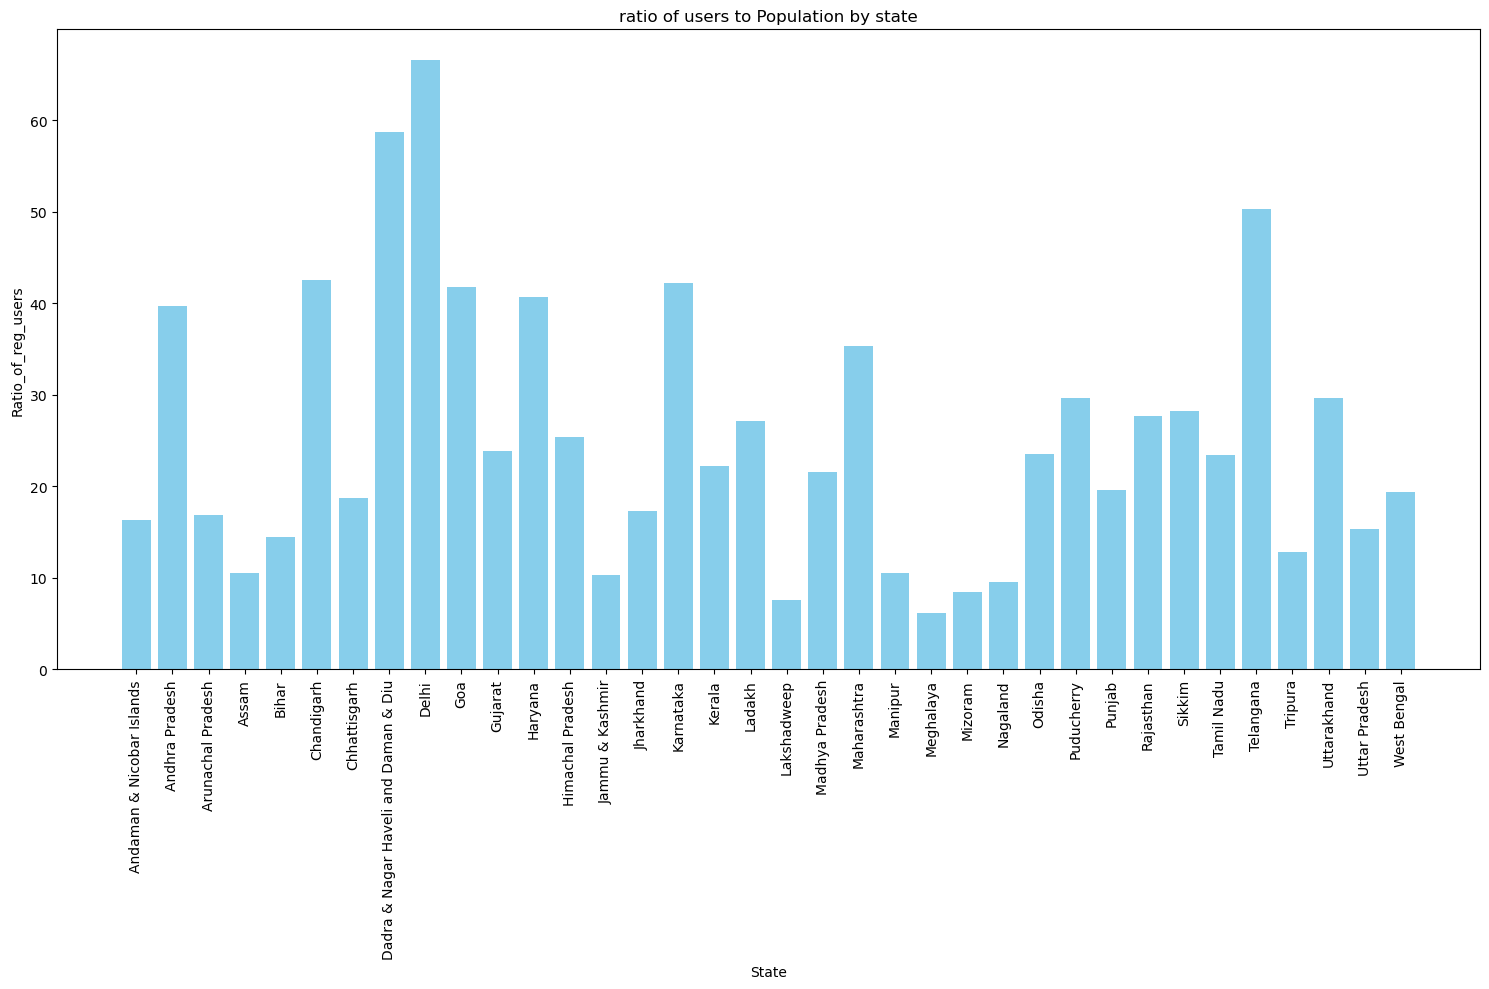

In [35]:
#Column chart depicting the ratio of users to Population by state
print("Column chart depicting the ratio of users to Population by state")
plt.figure(figsize=(15,10))
plt.bar(Merged_data['State'],Merged_data['Ratio_of_reg_users'],color = 'skyblue')
plt.xlabel("State")
plt.ylabel("Ratio_of_reg_users")
plt.title("ratio of users to Population by state")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Question 4.2: Correlate population density with transaction volume
Merged_date_set = pd.merge(District_Txn,DistrictDemo,on = ['State','Code'])
correlation = Merged_date_set['Density'].corr(Merged_date_set['Transactions'])
print("Correlate population density with transaction volume:",correlation)

Correlate population density with transaction volume: 0.19038897306782127


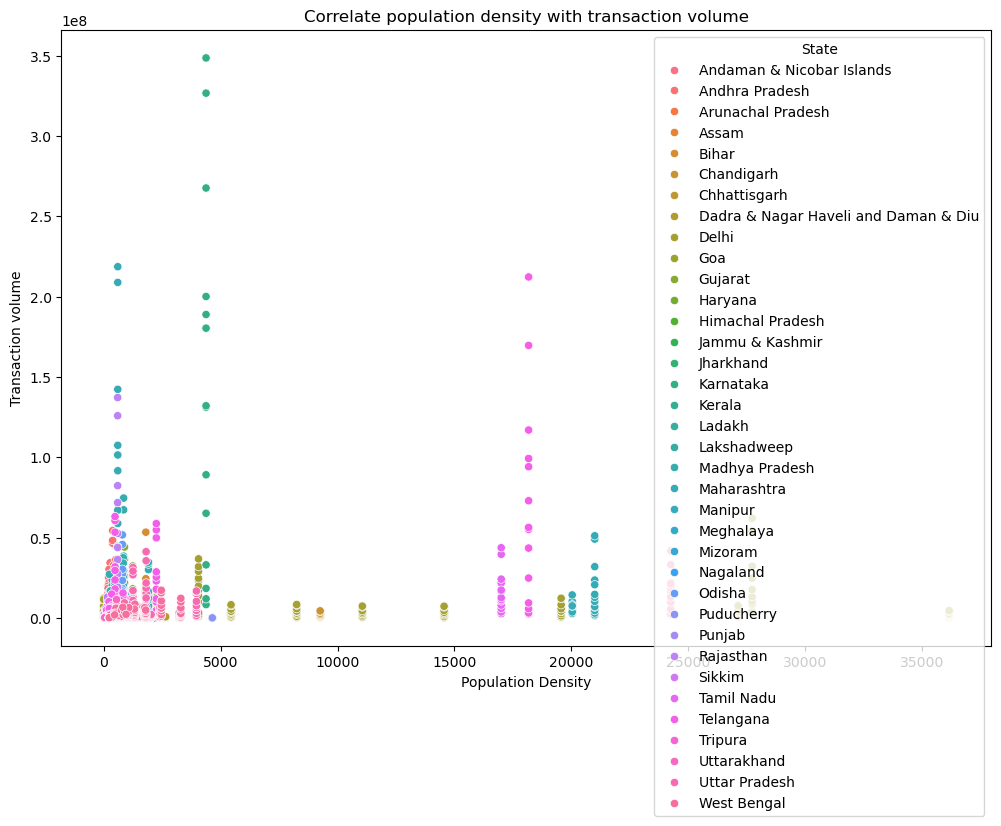

In [37]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = Merged_date_set,x='Density',y='Transactions',hue='State')
plt.title("Correlate population density with transaction volume")
plt.xlabel("Population Density")
plt.ylabel("Transaction volume")
plt.show()

In [38]:
#Question 4.3: Average transaction amount per user
state_avg_txn = State_Txn.groupby('State').agg({'Amount (INR)' : 'sum',
                                'Registered Users' : 'sum'}).reset_index()
state_avg_txn['Avg_Amount_per_user'] = state_avg_txn['Amount (INR)']/state_avg_txn['Registered Users']
print("Average Transaction Amount Per User for Each State:")
print(state_avg_txn[['State','Avg_Amount_per_user']])

Average Transaction Amount Per User for Each State:
                                   State  Avg_Amount_per_user
0              Andaman & Nicobar Islands          8917.369075
1                         Andhra Pradesh         20175.233763
2                      Arunachal Pradesh         11949.126662
3                                  Assam         10476.576498
4                                  Bihar         14221.991933
5                             Chandigarh         14129.308175
6                           Chhattisgarh         11098.884128
7   Dadra & Nagar Haveli and Daman & Diu          6907.815954
8                                  Delhi         17299.587909
9                                    Goa          9309.966756
10                               Gujarat          8746.070597
11                               Haryana         12386.401889
12                      Himachal Pradesh          7317.601442
13                       Jammu & Kashmir         11222.890558
14                

In [39]:
#Top 5 states higher and lower average transaction amount per user
top_5_highest = state_avg_txn.nlargest(5,'Avg_Amount_per_user')[['State','Avg_Amount_per_user']]
top_5_lowest = state_avg_txn.nsmallest(5,'Avg_Amount_per_user')[['State','Avg_Amount_per_user']]
print("\nTop 5 states higher average transaction amount per user")
print(top_5_highest)
print("\nTop 5 states lowest average transaction amount per user")
print(top_5_lowest)


Top 5 states higher average transaction amount per user
             State  Avg_Amount_per_user
31       Telangana         30653.509622
15       Karnataka         21474.282206
1   Andhra Pradesh         20175.233763
28       Rajasthan         17530.768707
8            Delhi         17299.587909

Top 5 states lowest average transaction amount per user
                                   State  Avg_Amount_per_user
18                           Lakshadweep          5614.898889
32                               Tripura          5727.184275
7   Dadra & Nagar Haveli and Daman & Diu          6907.815954
16                                Kerala          7274.846690
12                      Himachal Pradesh          7317.601442


In [40]:
#Question 4.4: Device brand usage ratio
Merged_data = pd.merge(State_DeviceData,State_Txn[['State','Year','Quarter','Registered Users']],on=['State','Year','Quarter'],how='inner')
Merged_data['user ratio'] = Merged_data['Registered Users_x']/Merged_data['Registered Users_y']
print("Device brand user ratio")
result = Merged_data[['State','Brand','user ratio']]
print(result)

Device brand user ratio
                          State    Brand  user ratio
0     Andaman & Nicobar Islands   Xiaomi    0.247033
1     Andaman & Nicobar Islands  Samsung    0.214392
2     Andaman & Nicobar Islands     Vivo    0.145697
3     Andaman & Nicobar Islands     Oppo    0.074332
4     Andaman & Nicobar Islands  OnePlus    0.049258
...                         ...      ...         ...
5539                West Bengal   Lenovo    0.019513
5540                West Bengal     Asus    0.016551
5541                West Bengal   Huawei    0.015182
5542                West Bengal    Apple    0.011201
5543                West Bengal   Others    0.107267

[5544 rows x 3 columns]


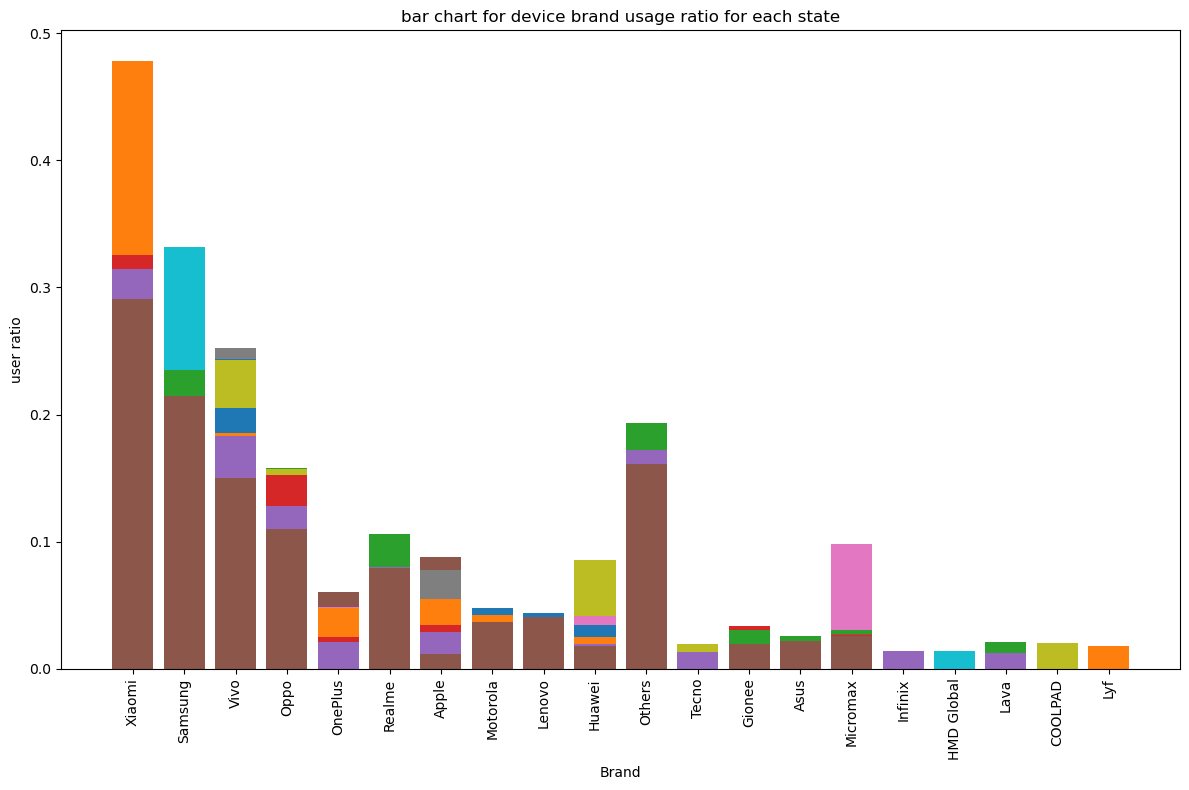

In [41]:
# Create a bar chart for device brand usage ratio for each state
plt.figure(figsize = (12,8))
for state in result['State'].unique():
    state_wise = result[result['State']==state]
    plt.bar(state_wise['Brand'],state_wise['user ratio'],label=state)
plt.xlabel("Brand")
plt.ylabel("user ratio")
plt.title("bar chart for device brand usage ratio for each state")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
#Task 5: Data Visualization
#Question 5.1: Plot the total transactions and amount over time for a selected state
State_Telangana_data = State_Txn[State_Txn['State']=='Telangana']
TS_group=State_Telangana_data.groupby(['Year','Quarter']).agg(Total_Transactions = ('Transactions','sum'),Total_amount = ('Amount (INR)','sum')).reset_index()
TS_group['State_Year_Quarter'] = TS_group['Year'].astype(str)+"Q"+TS_group['Quarter'].astype(str)
TS_group

,Year,Quarter,Total_Transactions,Total_amount,State_Year_Quarter
0,2018,1,8522766,1.330820e+10,2018Q1
1,2018,2,10764670,2.301720e+10,2018Q2
2,2018,3,19332703,3.203009e+10,2018Q3
3,2018,4,28921154,4.950909e+10,2018Q4
4,2019,1,65290702,9.552326e+10,2019Q1
5,2019,2,89610379,1.556764e+11,2019Q2
6,2019,3,121495376,2.019300e+11,2019Q3
7,2019,4,163572258,2.807468e+11,2019Q4
8,2020,1,199409525,3.713438e+11,2020Q1
9,2020,2,152055143,3.215318e+11,2020Q2


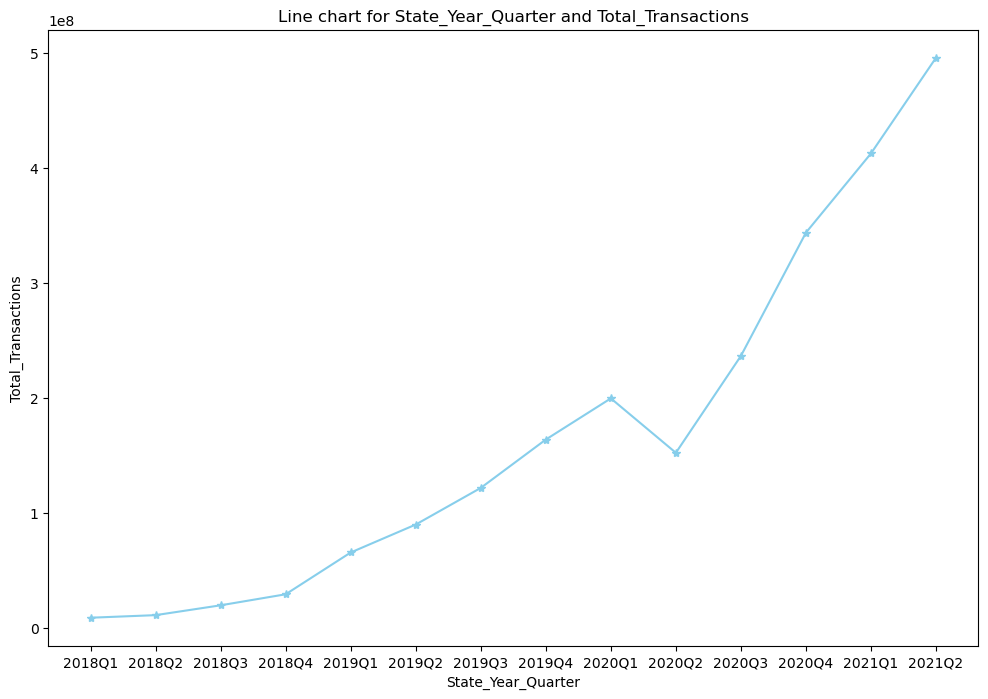

In [43]:
plt.figure(figsize=(12,8))
plt.plot(TS_group['State_Year_Quarter'],TS_group['Total_Transactions'],color='skyblue',marker='*')
plt.xlabel("State_Year_Quarter")
plt.ylabel("Total_Transactions")
plt.title("Line chart for State_Year_Quarter and Total_Transactions")
plt.show()

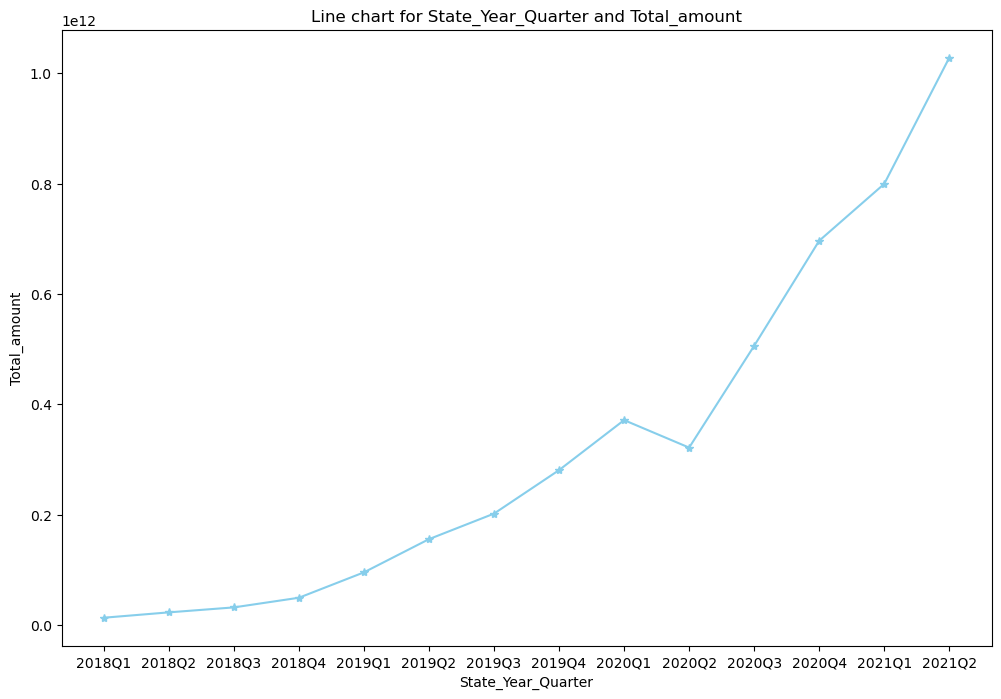

In [44]:
plt.figure(figsize=(12,8))
plt.plot(TS_group['State_Year_Quarter'],TS_group['Total_amount'],color='skyblue',marker='*')
plt.xlabel("State_Year_Quarter")
plt.ylabel("Total_amount")
plt.title("Line chart for State_Year_Quarter and Total_amount")
plt.show()

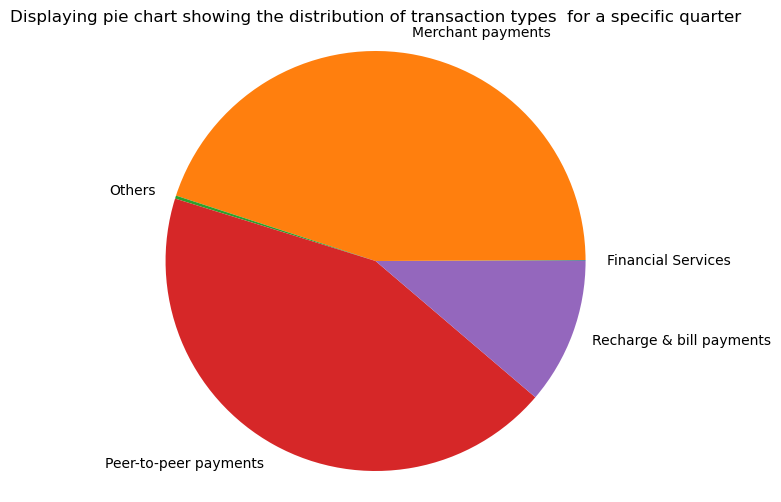

In [45]:
#Question 5.2: Create a pie chart showing the distribution of transaction types for a specific quarter
Telangana_data = State_TxnSplit[(State_TxnSplit['State']=='Telangana')&(State_TxnSplit['Year']==2021)&(State_TxnSplit['Quarter']==1)]
Telangana_Transactions = Telangana_data.groupby("Transaction Type")['Transactions'].sum()
plt.figure(figsize=(9,6))
plt.pie(Telangana_Transactions,labels=Telangana_Transactions.index)
plt.title("Displaying pie chart showing the distribution of transaction types  for a specific quarter")
plt.axis("equal")
plt.show()

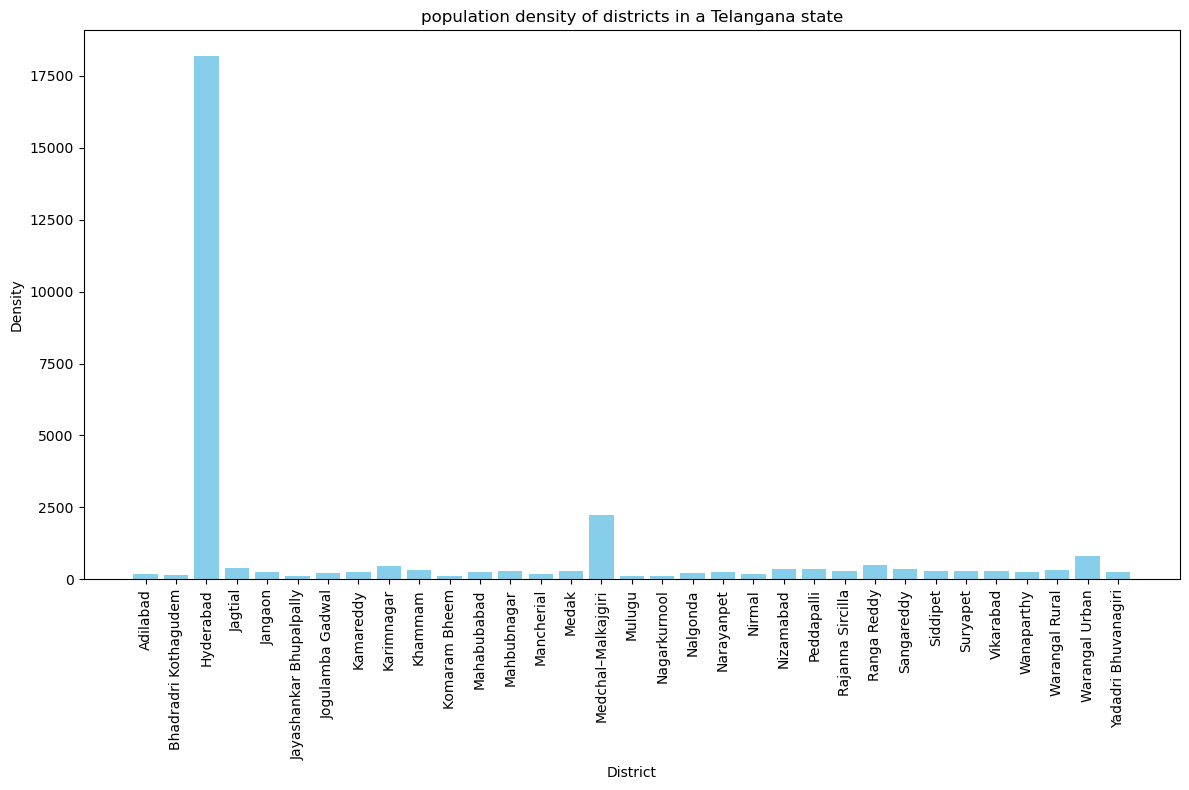

In [46]:
#Question 5.3: Visualize the population density of districts in a selected state
Telangana_data = DistrictDemo[DistrictDemo['State']=='Telangana']
Telangana_dist_density=Telangana_data.groupby('District')['Density'].sum().reset_index()
plt.figure(figsize=(12,8))
plt.bar(Telangana_dist_density['District'],Telangana_dist_density['Density'],color='skyblue',label='Telangana')
plt.xlabel('District')
plt.ylabel('Density')
plt.title("population density of districts in a Telangana state")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

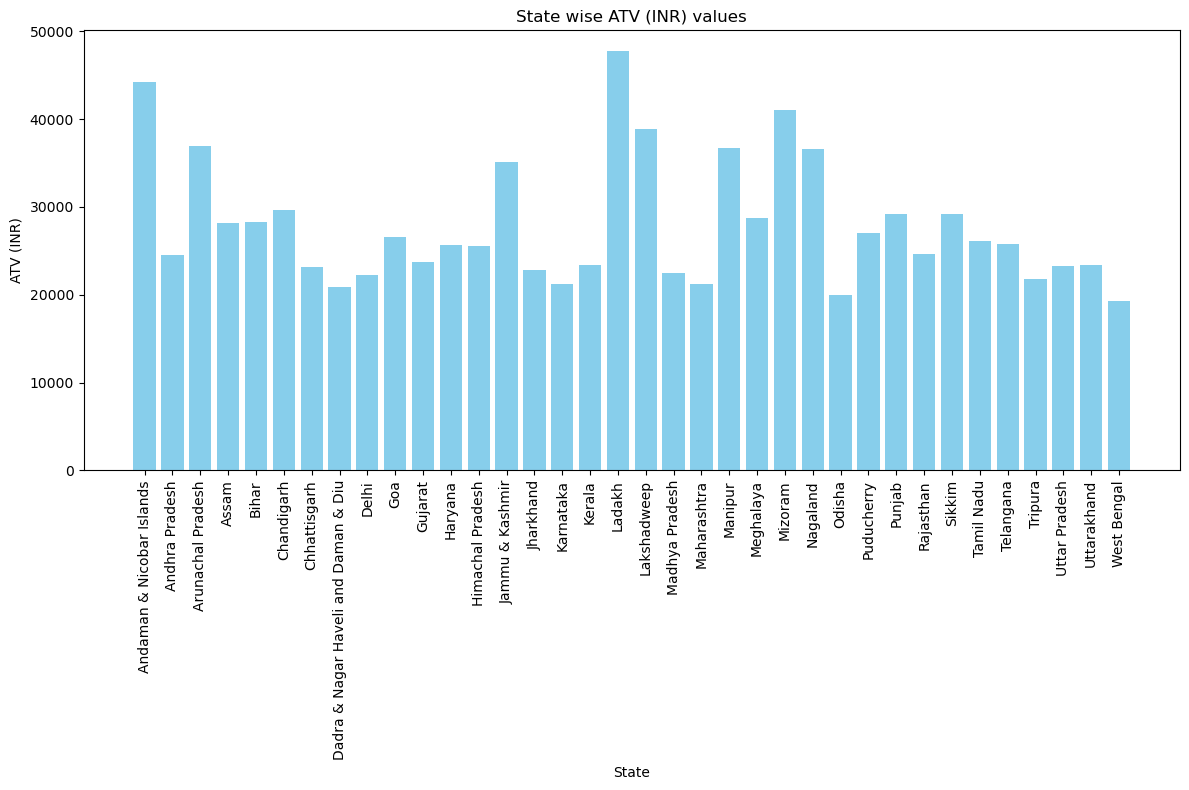

In [47]:
#Task 6: Insights and Conclusions [Advanced Section]
#Question 6.1: Identify any trends or patterns in the transaction data
State_wise_AVT = State_Txn.groupby(['State'])['ATV (INR)'].sum().reset_index()
State_wise_AVT
plt.figure(figsize = (12,8))
plt.bar(State_wise_AVT["State"],State_wise_AVT["ATV (INR)"],color='skyblue')
plt.xlabel("State")
plt.ylabel("ATV (INR)")
plt.title("State wise ATV (INR) values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

               Density  Transactions
Density       1.000000      0.307704
Transactions  0.307704      1.000000


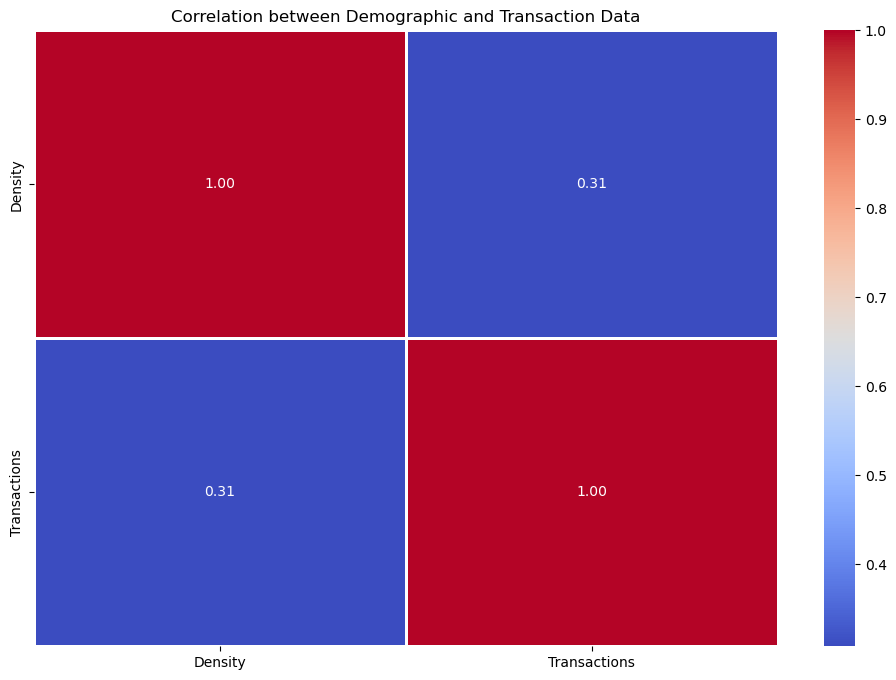

In [48]:
#Question 6.2: Correlate demographic data with transaction data
Merged_date_set = pd.merge(District_Txn,DistrictDemo,on = ['State','District'])
Corre_data = Merged_date_set[['Density', 'Transactions']]
corr_metrix = Corre_data.corr()
print(corr_metrix)
plt.figure(figsize=(12,8))
sns.heatmap(corr_metrix,annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation between Demographic and Transaction Data")
plt.show()

C:\Users\VamC\AppData\Local\Temp\ipykernel_15752\1707067886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_txn_summary, x='State', y='Transactions', palette='viridis')


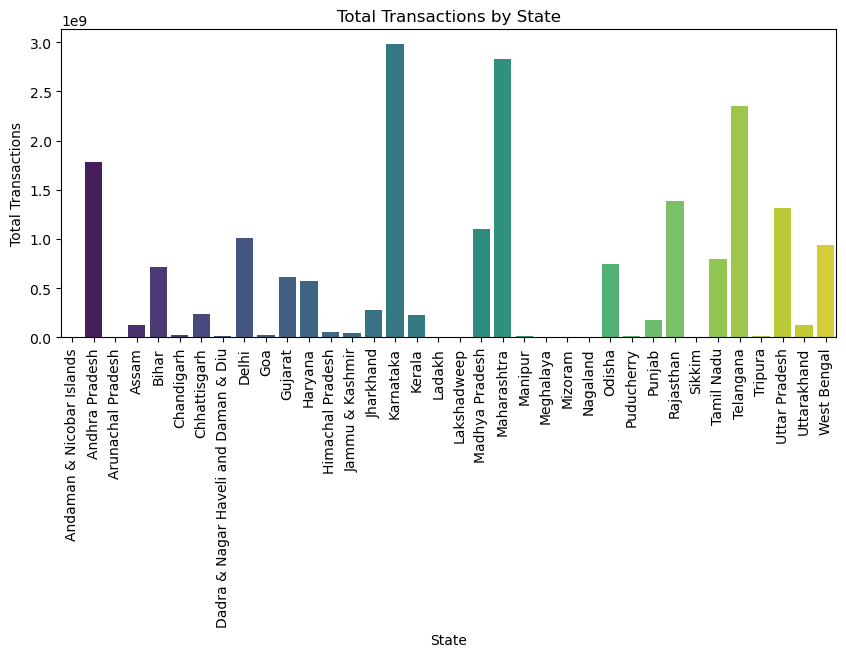

In [49]:
#Question 6.3: Summarize findings and insights
state_txn_summary = State_Txn.groupby('State')['Transactions'].sum().reset_index()

# Plot transactions by state
plt.figure(figsize=(10, 4))
sns.barplot(data=state_txn_summary, x='State', y='Transactions', palette='viridis')
plt.title('Total Transactions by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Transactions')
plt.show()

C:\Users\VamC\AppData\Local\Temp\ipykernel_15752\2729933025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_usage, x='Brand', y='Percentage', palette='muted')


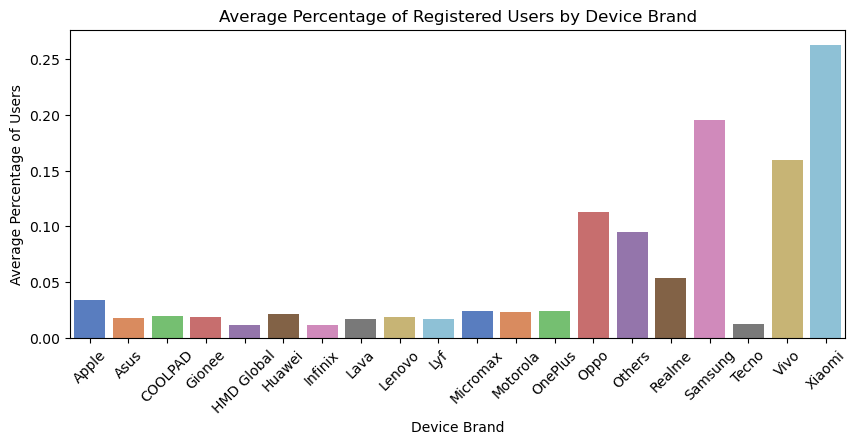

In [50]:
device_usage = State_DeviceData.groupby('Brand')['Percentage'].mean().reset_index()

# Plot brand usage across states
plt.figure(figsize=(10, 4))
sns.barplot(data=device_usage, x='Brand', y='Percentage', palette='muted')
plt.title('Average Percentage of Registered Users by Device Brand')
plt.xticks(rotation=45)
plt.xlabel('Device Brand')
plt.ylabel('Average Percentage of Users')
plt.show()